# https://www.kaggle.com/c/titanic

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
print('### 학습 데이터 정보 ###')
titanic_df.info()

### 학습 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 null 개수:',titanic_df.isnull().sum())

데이터 세트 null 개수: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [21]:
print('Sex 값 개수:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 개수:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 개수:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 개수:
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
E49              1
D37              1
D47              1
E38              1
C104             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [24]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(10)

0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object

In [26]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

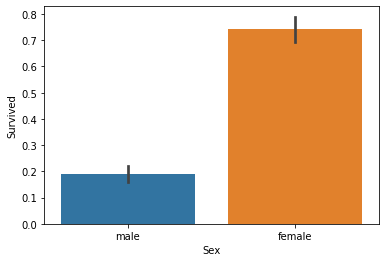

In [27]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

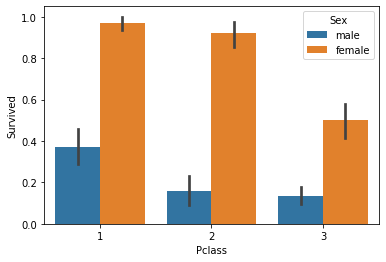

In [28]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

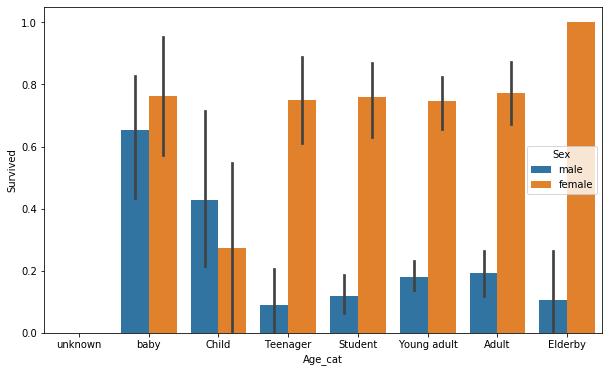

In [37]:
def category(age):
    cat=''
    if age <= -1: cat = 'unknown'
    elif age <= 5: cat = 'baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat= 'Teenager'
    elif age <= 25: cat= 'Student'
    elif age <= 35: cat= 'Young adult'
    elif age <= 60: cat = 'Adult'
    else: cat='Elderby'
        
    return cat

plt.figure(figsize=(10, 6))

group_names = ['unknown', 'baby', 'Child', 'Teenager', 'Student', 'Young adult', 'Adult', 'Elderby']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)


In [42]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [44]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
    return df

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df
    

In [7]:
titanic_df = pd.read_csv('train.csv')

X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df['Survived']

X_titanic_df = transform_features(X_titanic_df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=1)
rf_clf = RandomForestClassifier(random_state=1)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('dt 정확도:{0:.4f}\n'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('rf 정확도:{0:.4f}\n'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('lr 정확도:{0:.4f}\n'.format(accuracy_score(y_test, lr_pred)))

dt 정확도:0.8156

rf 정확도:0.8436

lr 정확도:0.8547



C:\Users\SYeong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SYeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        scores.append(accuracy)
        iter_count += 1
        print('{0}회차 교차 검증 정확도:{1:.4f}'.format(iter_count, accuracy))
    print('평균 교차 검증 정확도:{0:.4f}\n' .format(np.mean(scores)))
    
exec_kfold(dt_clf, folds=5)

1회차 교차 검증 정확도:0.7374
2회차 교차 검증 정확도:0.7697
3회차 교차 검증 정확도:0.8034
4회차 교차 검증 정확도:0.7697
5회차 교차 검증 정확도:0.7921
평균 교차 검증 정확도:0.7745



In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=10)
for iter_count, accuracy in enumerate(scores):
    iter_count += 1
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 교차 검증 정확도:{0:.4f}'.format(np.mean(scores)))

교차 검증 1 정확도: 0.7556
교차 검증 2 정확도: 0.7556
교차 검증 3 정확도: 0.7303
교차 검증 4 정확도: 0.7865
교차 검증 5 정확도: 0.8090
교차 검증 6 정확도: 0.7865
교차 검증 7 정확도: 0.8202
교차 검증 8 정확도: 0.7079
교차 검증 9 정확도: 0.8427
교차 검증 10 정확도: 0.7841
평균 교차 검증 정확도:0.7778


In [80]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',  
grid_dclf.fit(X_train, y_train)

print('최적의 하이퍼 파라미터:', grid_dclf.best_params_)
print('최고 정확도:', grid_dclf.best_score_)
best_estimator = grid_dclf.best_estimator_
prediction = best_estimator.predict(X_test)
#print(prediction)
accruracy = accuracy_score(y_test, prediction)
print('테스트 세트에서의 dt정확도:{0:.4f}'.format(accuracy))


최적의 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 정확도: 0.7991573033707865
[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0]
테스트 세트에서의 dt정확도:0.7966


C:\Users\SYeong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
